In [149]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [165]:
df = pd.read_csv('data.csv')
print(df.info())
print(df.describe())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22524 entries, 0 to 22523
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       22524 non-null  int64 
 1   Date Created     22524 non-null  object
 2   Number of Likes  22524 non-null  int64 
 3   Source of Tweet  22524 non-null  object
 4   Tweet            22524 non-null  object
 5   Sentiment        22524 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.0+ MB
None
         Unnamed: 0  Number of Likes
count  22524.000000     22524.000000
mean   11261.500000        23.822856
std     6502.263068      2128.018705
min        0.000000         0.000000
25%     5630.750000         0.000000
50%    11261.500000         0.000000
75%    16892.250000         2.000000
max    22523.000000    316867.000000


,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative
...,...,...,...,...,...,...
22519,22519,2022-11-20 00:00:21+00:00,1,Twitter Web App,Here We go World cup 2022 #WorldCup2022,positive
22520,22520,2022-11-20 00:00:03+00:00,0,DenetPro,Anderlecht confirms former Viborg FF's Jesper ...,neutral
22521,22521,2022-11-20 00:00:01+00:00,2,Twitter for iPhone,Great thread to read before the start of #Worl...,positive
22522,22522,2022-11-20 00:00:00+00:00,11,Twitter Web App,Raphinha wants Brazil to be united at the #Wor...,positive


Total likes for iPhone: 377434
Total likes for Android: 30818


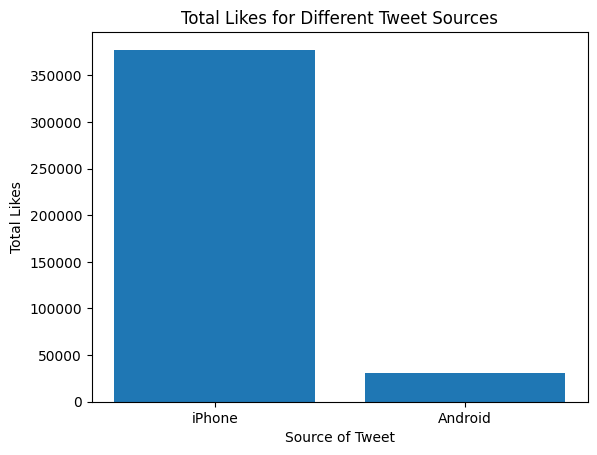

In [151]:
iphone_condition = df['Source of Tweet'] == 'Twitter for iPhone'
android_condition = df['Source of Tweet'] == 'Twitter for Android'

iphone_likes_sum = df.loc[iphone_condition, 'Number of Likes'].sum()
android_likes_sum = df.loc[android_condition, 'Number of Likes'].sum()

labels = ['iPhone', 'Android']
likes_counts = [iphone_likes_sum, android_likes_sum]

print("Total likes for iPhone:", iphone_likes_sum)
print("Total likes for Android:", android_likes_sum)

plt.bar(labels, likes_counts)
plt.ylabel('Total Likes')
plt.xlabel('Source of Tweet')
plt.title('Total Likes for Different Tweet Sources')
plt.show()

In [152]:
highest_likes_index = df['Number of Likes'].idxmax()
highest_likes_tweet = df.loc[highest_likes_index, 'Tweet']
highest_likes_count = df.loc[highest_likes_index, 'Number of Likes']
highest_likes_device = df.loc[highest_likes_index, 'Source of Tweet']

print("Highest Liked Tweet:", highest_likes_tweet)
print("Number of Likes:", highest_likes_count)
print("Source of Tweet:", highest_likes_device)

Highest Liked Tweet: I can’t express my gratitude and happiness for my participation in the biggest event of all times the World Cup in my country #Qatar with the talented Jung kook , thank you for everything
#WorldCup 
#WorldCup2022 
#JUNGKOOKxFIFA 
#JungkookAtFIFAWorldCup 
@BTS_twt 
@bts_bighit https://t.co/PebpCj9uN2
Number of Likes: 316867
Source of Tweet: Twitter for iPhone


positive: 8489
neutral: 8251
negative: 5784


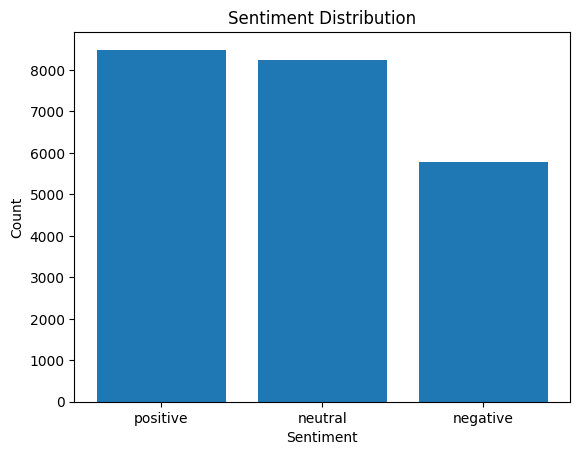

In [153]:
sentiment_counts = df['Sentiment'].value_counts()

labels = sentiment_counts.index
counts = sentiment_counts.values

for label, count in zip(labels, counts):
    print(f"{label}: {count}")

plt.bar(labels, counts)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

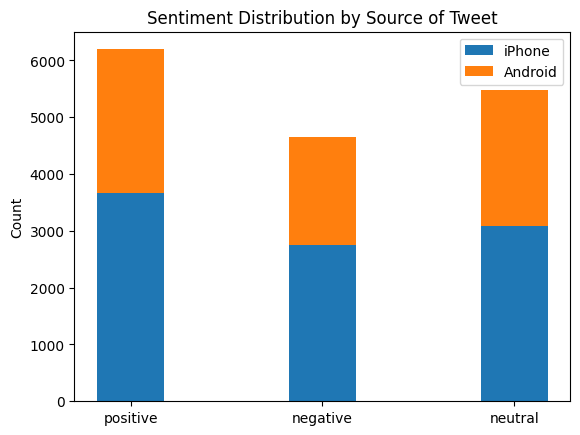

In [154]:
iphone_condition = df['Source of Tweet'] == 'Twitter for iPhone'
android_condition = df['Source of Tweet'] == 'Twitter for Android'

iphone_sentiment_counts = df.loc[iphone_condition, 'Sentiment'].value_counts()
android_sentiment_counts = df.loc[android_condition, 'Sentiment'].value_counts()

# Make sure all sentiments are included in both Series for consistent labels
all_sentiments = ['positive', 'negative', 'neutral']
iphone_sentiment_counts = iphone_sentiment_counts.reindex(all_sentiments, fill_value=0)
android_sentiment_counts = android_sentiment_counts.reindex(all_sentiments, fill_value=0)

labels = all_sentiments
width = 0.35  # width of the bars

fig, ax = plt.subplots()
iphone_bar = ax.bar(labels, iphone_sentiment_counts, width, label='iPhone')
android_bar = ax.bar(labels, android_sentiment_counts, width, label='Android', bottom=iphone_sentiment_counts)

ax.set_ylabel('Count')
ax.set_title('Sentiment Distribution by Source of Tweet')
ax.legend()

plt.show()

In [155]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)   # Removes @mention
    text = re.sub(r'#', '',text)    # Removing the hashtags
    text= re.sub(r'RT[\s]:+', '', text)  # Removing RT
    text = re.sub(r'[^a-zA-Z\s]', '', text) #Removing all non english characters
    return text

df['Tweet'] = df['Tweet'].astype(str).apply(cleanTxt)
print(df['Tweet'])

0        What are we drinking today  \n \nalgo \ngoanna...
1        Amazing   WorldCup launch video Shows how much...
2        Worth reading while watching WorldCup httpstco...
3        Golden Maknae shinning bright\n\nhttpstcoAyZbz...
4        If the BBC cares so much about human rights ho...
                               ...                        
22519                       Here We go World cup  WorldCup
22520    Anderlecht confirms former Viborg FFs Jesper F...
22521    Great thread to read before the start of World...
22522    Raphinha wants Brazil to be united at the Worl...
22523    How to buy SOT on PinkSale\n\nHave you been co...
Name: Tweet, Length: 22524, dtype: object


In [156]:
X_train = df['Tweet']  # Features from training dataset
y_train = df['Sentiment']  # Target variable from training dataset

Accuracy: 0.6856825749167591
F1 Score (Micro): 0.6856825749167591
Precision (Micro): 0.6856825749167591
Recall (Micro): 0.6856825749167591


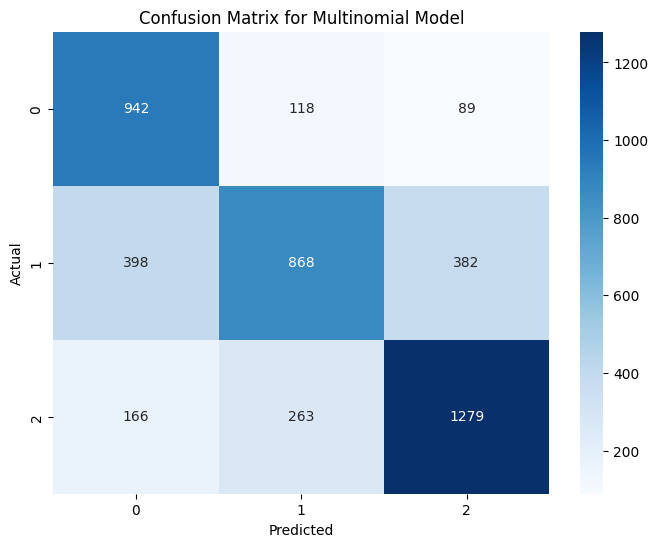

In [157]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create an instance of the CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer()

# Convert text data into numerical features for training dataset
X_train_vectorized = vectorizer.fit_transform(X_train)

# Create an instance of the Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model using the training data
model.fit(X_train_vectorized, y_train)

# Convert text data into numerical features for validation dataset
X_val_vectorized = vectorizer.transform(X_val)

# Make predictions on the validation dataset using the trained model
predictions = model.predict(X_val_vectorized)

# Calculate evaluation metrics using the actual target values from the validation dataset
accuracy = accuracy_score(y_val, predictions)
f1_micro = f1_score(y_val, predictions, average='micro')
precision_micro = precision_score(y_val, predictions, average='micro')
recall_micro = recall_score(y_val, predictions, average='micro')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score (Micro):", f1_micro)
print("Precision (Micro):", precision_micro)
print("Recall (Micro):", recall_micro)

cm = confusion_matrix(y_val, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Multinomial Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression model Accuracy: 0.727857935627081
Logistic Regression model F1 Score: 0.727857935627081
Logistic Regression model Precision: 0.727857935627081
Logistic Regression model Recall: 0.727857935627081


c:\Users\fiifi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


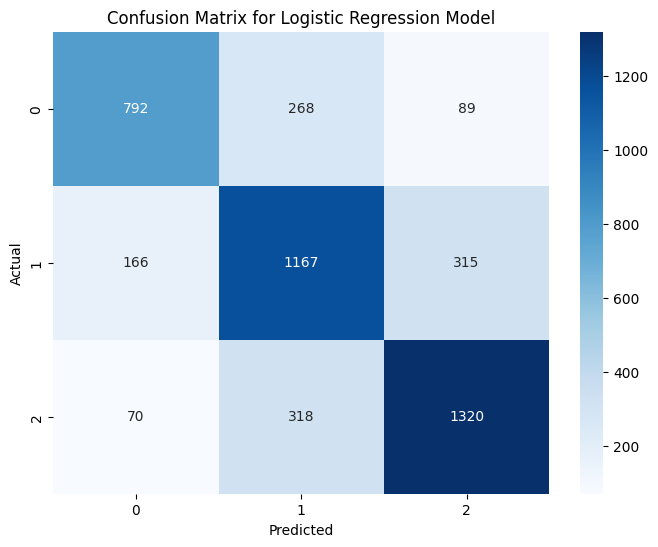

In [158]:
# Create an instance of the Logistic Regression model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train_vectorized, y_train)

# Make predictions on the validation dataset using the trained model
predictions = model.predict(X_val_vectorized)

# Calculate evaluation metrics using the actual target values from the validation dataset
accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions, average='micro')
precision = precision_score(y_val, predictions, average='micro')
recall= recall_score(y_val, predictions, average='micro')


# Add Multinomial Naive Bayes scores
scores_df.loc[1] = ['Logistic Regression', accuracy, f1, precision, recall]

# Print the evaluation metrics
print("Logistic Regression model Accuracy:", accuracy)
print("Logistic Regression model F1 Score:", f1)
print("Logistic Regression model Precision:", precision)
print("Logistic Regression model Recall:", recall)
cm = confusion_matrix(y_val, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVM Accuracy: 0.7152053274139845
SVM F1 Score (Micro): 0.7152053274139845
SVM Precision (Micro): 0.7152053274139845
SVM Recall (Micro): 0.7152053274139845


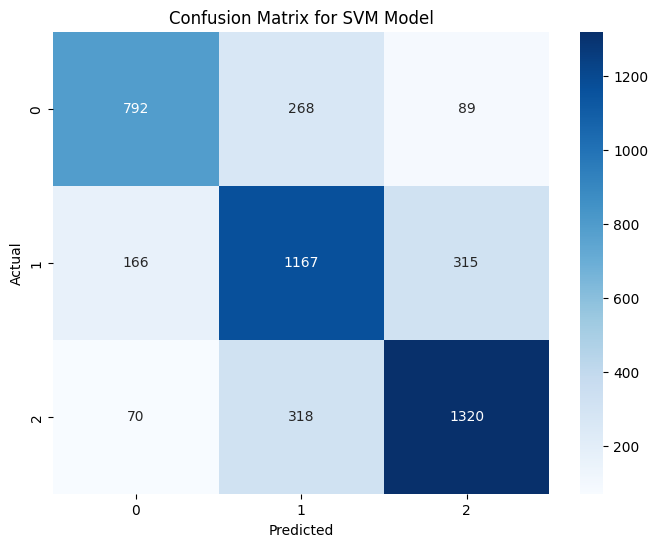

In [159]:
# Create an instance of the CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer()

# Convert text data into numerical features for training dataset
X_train_vectorized = vectorizer.fit_transform(X_train)

# Create an instance of the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)  # You can also try different kernels

# Train the SVM model using the training data
svm_model.fit(X_train_vectorized, y_train)

# Convert text data into numerical features for validation dataset
X_val_vectorized = vectorizer.transform(X_val)

# Make predictions on the validation dataset using the trained SVM model
svm_predictions = svm_model.predict(X_val_vectorized)

# Calculate evaluation metrics using the actual target values from the validation dataset
svm_accuracy = accuracy_score(y_val, svm_predictions)
svm_f1_micro = f1_score(y_val, svm_predictions, average='micro')
svm_precision_micro = precision_score(y_val, svm_predictions, average='micro')
svm_recall_micro = recall_score(y_val, svm_predictions, average='micro')

# Print evaluation metrics for SVM
print("SVM Accuracy:", svm_accuracy)
print("SVM F1 Score (Micro):", svm_f1_micro)
print("SVM Precision (Micro):", svm_precision_micro)
print("SVM Recall (Micro):", svm_recall_micro)

cm = confusion_matrix(y_val, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Accuracy: 0.6859045504994451
Random Forest F1 Score (Micro): 0.6859045504994451
Random Forest Precision (Micro): 0.6859045504994451
Random Forest Recall (Micro): 0.6859045504994451


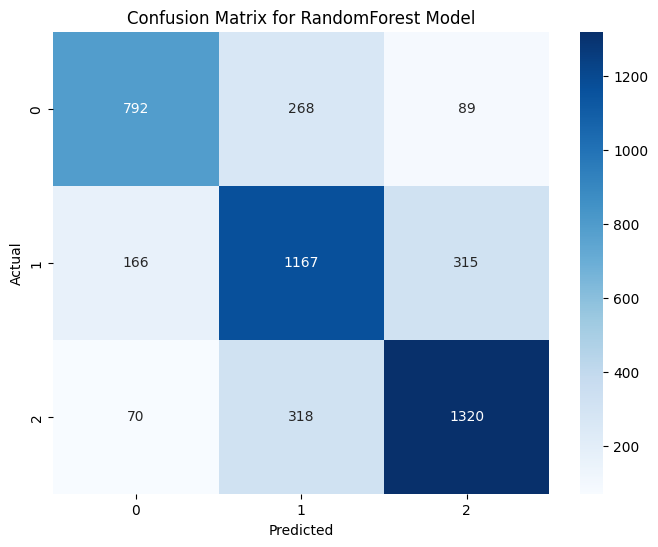

In [160]:
# Create an instance of the CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer()

# Convert text data into numerical features for training dataset
X_train_vectorized = vectorizer.fit_transform(X_train)

# Create an instance of the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters

# Train the Random Forest model using the training data
rf_model.fit(X_train_vectorized, y_train)

# Convert text data into numerical features for validation dataset
X_val_vectorized = vectorizer.transform(X_val)

# Make predictions on the validation dataset using the trained Random Forest model
rf_predictions = rf_model.predict(X_val_vectorized)

# Calculate evaluation metrics using the actual target values from the validation dataset
rf_accuracy = accuracy_score(y_val, rf_predictions)
rf_f1_micro = f1_score(y_val, rf_predictions, average='micro')
rf_precision_micro = precision_score(y_val, rf_predictions, average='micro')
rf_recall_micro = recall_score(y_val, rf_predictions, average='micro')

# Print evaluation metrics for Random Forest
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1 Score (Micro):", rf_f1_micro)
print("Random Forest Precision (Micro):", rf_precision_micro)
print("Random Forest Recall (Micro):", rf_recall_micro)

cm = confusion_matrix(y_val, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for RandomForest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

LinearSVC Accuracy: 0.7100998890122087
LinearSVC F1 Score (Micro): 0.7100998890122087
LinearSVC Precision (Micro): 0.7100998890122087
LinearSVC Recall (Micro): 0.7100998890122087


c:\Users\fiifi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


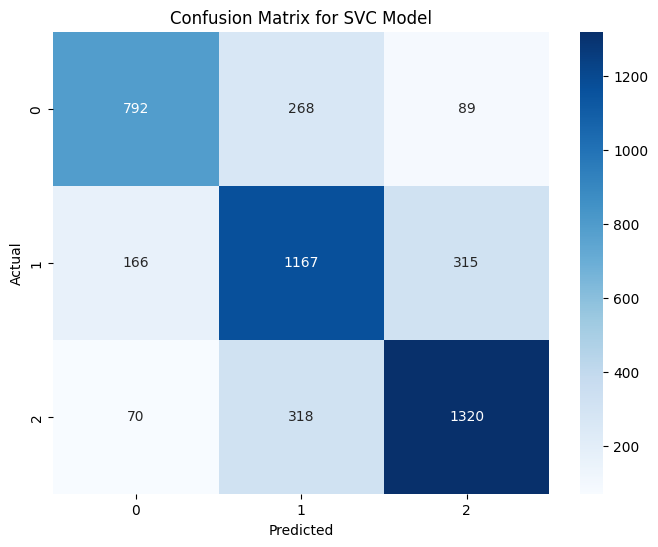

In [161]:
from sklearn.svm import LinearSVC

# Create an instance of the CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer()

# Convert text data into numerical features for training dataset
X_train_vectorized = vectorizer.fit_transform(X_train)

# Create an instance of the LinearSVC classifier
linear_svc_model = LinearSVC(random_state=42)  # You can adjust hyperparameters

# Train the LinearSVC model using the training data
linear_svc_model.fit(X_train_vectorized, y_train)

# Convert text data into numerical features for validation dataset
X_val_vectorized = vectorizer.transform(X_val)

# Make predictions on the validation dataset using the trained LinearSVC model
linear_svc_predictions = linear_svc_model.predict(X_val_vectorized)

# Calculate evaluation metrics using the actual target values from the validation dataset
linear_svc_accuracy = accuracy_score(y_val, linear_svc_predictions)
linear_svc_f1_micro = f1_score(y_val, linear_svc_predictions, average='micro')
linear_svc_precision_micro = precision_score(y_val, linear_svc_predictions, average='micro')
linear_svc_recall_micro = recall_score(y_val, linear_svc_predictions, average='micro')

# Print evaluation metrics for LinearSVC
print("LinearSVC Accuracy:", linear_svc_accuracy)
print("LinearSVC F1 Score (Micro):", linear_svc_f1_micro)
print("LinearSVC Precision (Micro):", linear_svc_precision_micro)
print("LinearSVC Recall (Micro):", linear_svc_recall_micro)

cm = confusion_matrix(y_val, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for SVC Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Accuracy: 0.6037735849056604
Decision Tree F1 Score (Micro): 0.6037735849056604
Decision Tree Precision (Micro): 0.6037735849056604
Decision Tree Recall (Micro): 0.6037735849056604


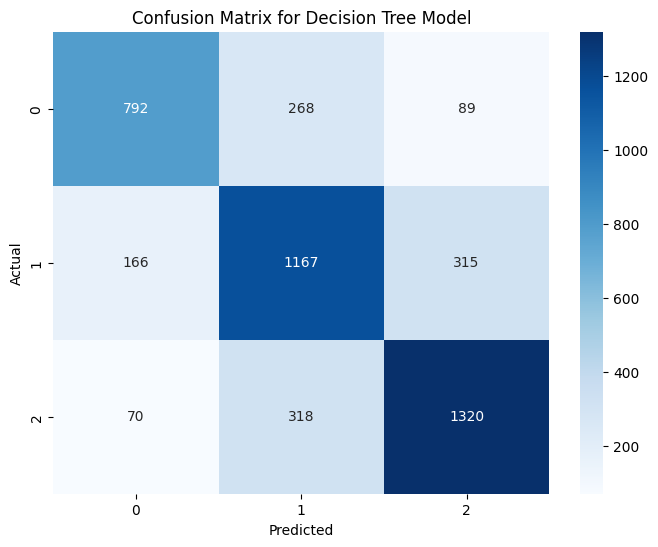

In [162]:
from sklearn.tree import DecisionTreeClassifier

# Assuming you have X_train, X_val, y_train, y_val defined

# Create an instance of the CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer()

# Convert text data into numerical features for training dataset
X_train_vectorized = vectorizer.fit_transform(X_train)

# Create an instance of the DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters

# Train the Decision Tree model using the training data
dt_model.fit(X_train_vectorized, y_train)

# Convert text data into numerical features for validation dataset
X_val_vectorized = vectorizer.transform(X_val)

# Make predictions on the validation dataset using the trained Decision Tree model
dt_predictions = dt_model.predict(X_val_vectorized)

# Calculate evaluation metrics using the actual target values from the validation dataset
dt_accuracy = accuracy_score(y_val, dt_predictions)
dt_f1_micro = f1_score(y_val, dt_predictions, average='micro')
dt_precision_micro = precision_score(y_val, dt_predictions, average='micro')
dt_recall_micro = recall_score(y_val, dt_predictions, average='micro')

# Print evaluation metrics for Decision Tree
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1 Score (Micro):", dt_f1_micro)
print("Decision Tree Precision (Micro):", dt_precision_micro)
print("Decision Tree Recall (Micro):", dt_recall_micro)

cm = confusion_matrix(y_val, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Decision Tree Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

KNN Accuracy: 0.5351831298557159
KNN F1 Score (Micro): 0.5351831298557159
KNN Precision (Micro): 0.5351831298557159
KNN Recall (Micro): 0.5351831298557159


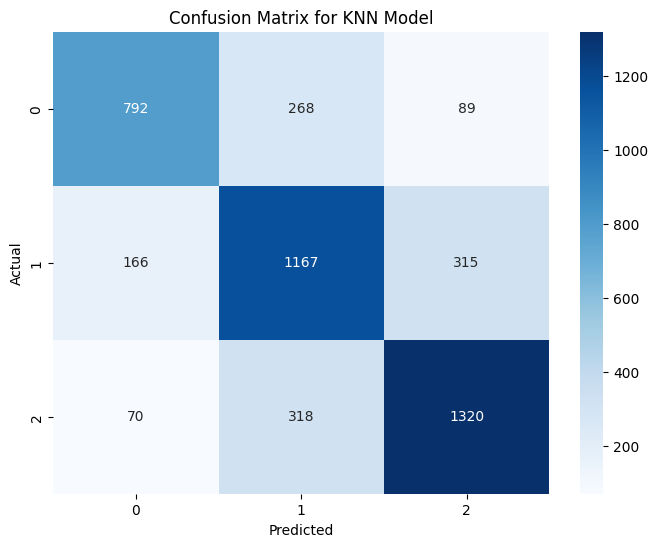

In [163]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer()

# Convert text data into numerical features for training dataset
X_train_vectorized = vectorizer.fit_transform(X_train)

# Create an instance of the KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the KNN model using the training data
knn_model.fit(X_train_vectorized, y_train)

# Convert text data into numerical features for validation dataset
X_val_vectorized = vectorizer.transform(X_val)

# Make predictions on the validation dataset using the trained KNN model
knn_predictions = knn_model.predict(X_val_vectorized)

# Calculate evaluation metrics using the actual target values from the validation dataset
knn_accuracy = accuracy_score(y_val, knn_predictions)
knn_f1_micro = f1_score(y_val, knn_predictions, average='micro')
knn_precision_micro = precision_score(y_val, knn_predictions, average='micro')
knn_recall_micro = recall_score(y_val, knn_predictions, average='micro')

# Print evaluation metrics for KNN
print("KNN Accuracy:", knn_accuracy)
print("KNN F1 Score (Micro):", knn_f1_micro)
print("KNN Precision (Micro):", knn_precision_micro)
print("KNN Recall (Micro):", knn_recall_micro)

cm = confusion_matrix(y_val, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SGD Accuracy: 0.727857935627081
SGD F1 Score (Micro): 0.727857935627081
SGD Precision (Micro): 0.727857935627081
SGD Recall (Micro): 0.727857935627081


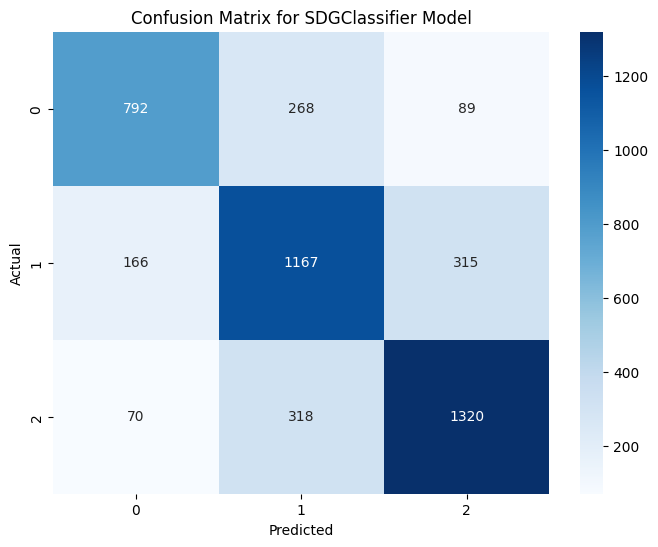

In [164]:
from sklearn.linear_model import SGDClassifier

# Assuming you have X_train, X_val, y_train, y_val defined

# Create an instance of the CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer()

# Convert text data into numerical features for training dataset
X_train_vectorized = vectorizer.fit_transform(X_train)

# Create an instance of the SGDClassifier
sgd_model = SGDClassifier(loss='hinge', random_state=42)  # You can adjust hyperparameters

# Train the SGD model using the training data
sgd_model.fit(X_train_vectorized, y_train)

# Convert text data into numerical features for validation dataset
X_val_vectorized = vectorizer.transform(X_val)

# Make predictions on the validation dataset using the trained SGD model
sgd_predictions = sgd_model.predict(X_val_vectorized)

# Calculate evaluation metrics using the actual target values from the validation dataset
sgd_accuracy = accuracy_score(y_val, sgd_predictions)
sgd_f1_micro = f1_score(y_val, sgd_predictions, average='micro')
sgd_precision_micro = precision_score(y_val, sgd_predictions, average='micro')
sgd_recall_micro = recall_score(y_val, sgd_predictions, average='micro')

# Print evaluation metrics for SGD
print("SGD Accuracy:", sgd_accuracy)
print("SGD F1 Score (Micro):", sgd_f1_micro)
print("SGD Precision (Micro):", sgd_precision_micro)
print("SGD Recall (Micro):", sgd_recall_micro)

cm = confusion_matrix(y_val, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for SDGClassifier Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()